In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ddda83521f99411ec992232e0ab1e96bdb805e6e2faa13cf7f3ae2c76fc0eae7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
!pip install anchor-exp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for anchor-exp: filename=anchor_exp-0.0.2.0-py3-none-any.whl size=433498 sha256=5fe308a06e1f98ff152c3e5abda82b7f28f75ad618d6b9339d27c24ba495fc32
  Stored in directory: /root/.cache/pip/wheels/e9/53/45/7e4602020c5e5069ccef79f1389adb8efc4ca3c4d9891388bb
Successfully built anchor-exp


In [3]:
!pip install dice-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [4]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
import seaborn as sns

In [6]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx")
#Importing the data so as to use the same data with every run
X_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_train.xlsx")
y_train = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_train.xlsx")
X_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/X_test.xlsx")
y_test = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/y_test.xlsx")

In [8]:
X_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
X_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
y_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
X_test.set_index('Index', inplace=True)
X_train.set_index('Index', inplace=True)
y_test.set_index('Index', inplace=True)
y_train.set_index('Index', inplace=True)
y_train = y_train.TARGET_ABUSER
y_test = y_test.TARGET_ABUSER

In [9]:
X_test.shape

(10078, 47)

## Feature Importance

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5010
           1       0.88      0.82      0.85      5068

    accuracy                           0.86     10078
   macro avg       0.86      0.86      0.86     10078
weighted avg       0.86      0.86      0.86     10078

Area Under the Curve 0.8564148734890126
Confusion Matrix : 
[[4459  551]
 [ 898 4170]]


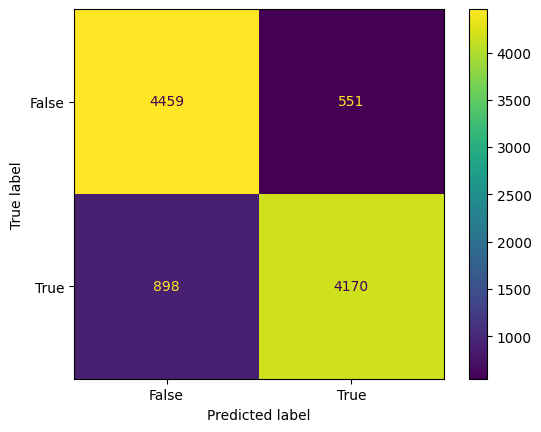

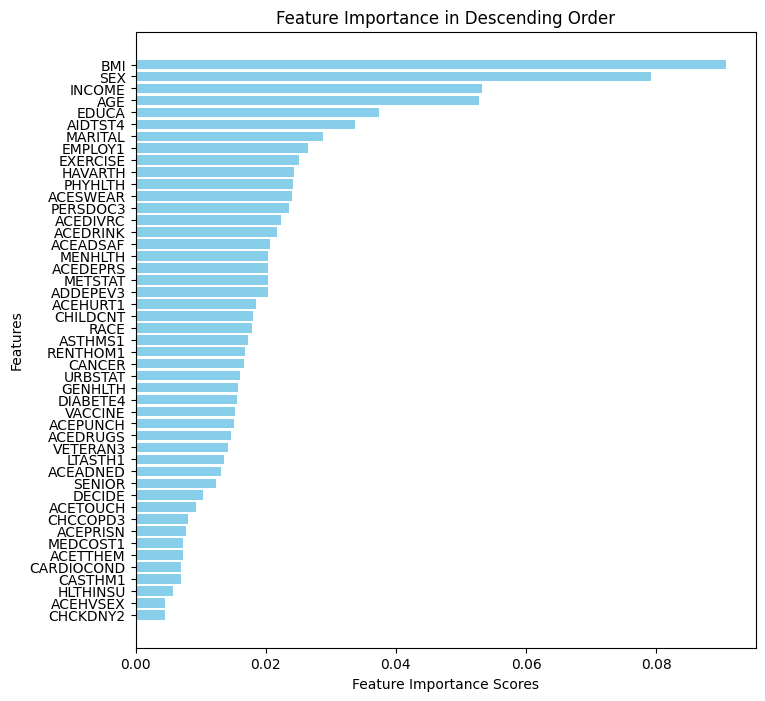

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators=400, random_state=32)
# fiting the model to data
rf.fit(X_train, y_train)
#print(rf.score(X_train,y_train))
y_pred_rf = rf.predict(X_test)
clf_report = classification_report(y_test, y_pred_rf)
print(f"Classification Report : \n{clf_report}")
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_rf)
#print AUC score
print('Area Under the Curve',auc)
#printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix : \n{confusion_matrix}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# get feature importance
feature_importances = rf.feature_importances_

plt.rcParams["figure.figsize"] = (8,8)
# Get feature names
feature_names = X_train.columns.tolist()
# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(feature_importances)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a DataFrame using pandas
feature_results_gini = pd.DataFrame({'Feature Names': sorted_feature_names, 'Importance': sorted_feature_importances})

# Plot the horizontal bar chart for feature importance
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Feature Importance in Descending Order')
plt.show()

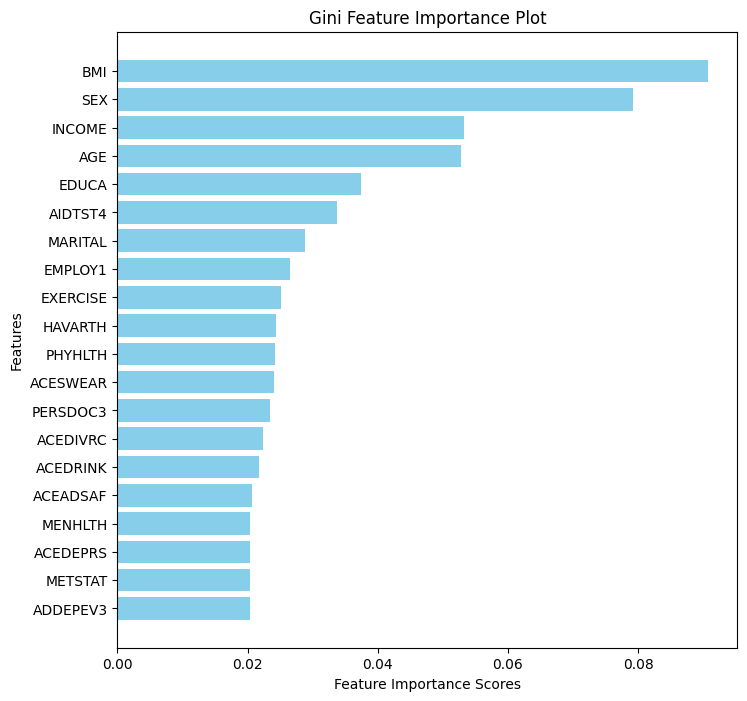

In [11]:
# Plot the horizontal bar chart for feature importance showing top 20 features only
plt.barh(feature_results_gini['Feature Names'].tail(20), feature_results_gini['Importance'].tail(20), color='skyblue')
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Gini Feature Importance Plot')
plt.show()

In [ ]:
#Calculating feature importance using permutation importance
from sklearn.inspection import permutation_importance
disp= []
perm_importances = permutation_importance(rf, X_test, y_test).importances_mean
sorted_indices_perm = perm_importances.argsort()
feature_names_perm = X_test.columns
feature_results_perm = pd.DataFrame({'Importance': perm_importances}, index=feature_names_perm[sorted_indices_perm]).sort_values('Importance',ascending=True)
# Reset the index and move it into a new column
feature_results_perm.reset_index(inplace=True)
# Rename the column containing the old index
feature_results_perm.rename(columns={'index': 'Feature Names'}, inplace=True)

In [ ]:
# Plot the horizontal bar chart for feature importance showing top 20 features only
plt.barh(feature_results_perm['Feature Names'].tail(20), feature_results_perm['Importance'].tail(20), color='#0000FF')
plt.xlabel('Perm Importances')
plt.ylabel('Features')
plt.title('Perm Feature Importance Plot')
plt.show()

## Identifying the records to be used for Interpretability

In [ ]:
# For getting different dataframes of FP, TP, FN and TN
# Predict probabilities for each class on the test set
probabilitiesrf = rf.predict_proba(X_test)
# Converting the probabilities into a dataframe
df_prob_rf = pd.DataFrame(probabilitiesrf)
# Adduing index column of test data to compare later
df_prob_rf['index_column'] = X_test.index
# Creating a dataframe to store all the predicted values
df_pred_rf = pd.DataFrame(y_pred_rf)
# Creating a dataframe to store all the actual values
df_actual_rf = pd.DataFrame(y_test)
#Creating a new dataframe to store the results
df_results_rf = pd.DataFrame()
df_results_rf['index_column'] = df_actual_rf.index
df_results_rf['Actual'] = df_actual_rf.values
df_results_rf['Predicted'] = df_pred_rf.values
# Merging the actual and predicted y values with the probability of each prediction
df_merged_rf = pd.merge(df_results_rf, df_prob_rf, on='index_column')
#Renaming the columns for better understanding
df_merged_rf.rename(columns={0: 'Prob_0'}, inplace=True)
df_merged_rf.rename(columns={1: 'Prob_1'}, inplace=True)
# Dividing the dataframes based on TP, FP, TN and FN
df_tp_rf = df_merged_rf[(df_merged_rf['Actual'] == 1) & (df_merged_rf['Predicted'] == 1)]
df_tn_rf = df_merged_rf[(df_merged_rf['Actual'] == 0) & (df_merged_rf['Predicted'] == 0)]
df_fp_rf = df_merged_rf[(df_merged_rf['Actual'] == 0) & (df_merged_rf['Predicted'] == 1)]
df_fn_rf = df_merged_rf[(df_merged_rf['Actual'] == 1) & (df_merged_rf['Predicted'] == 0)]

True Positives

In [ ]:
df_tp_rf[df_tp_rf['Prob_1']>0.95].sort_values(by='index_column', ascending=True)

In [ ]:
df_tp_rf[df_tp_rf['Prob_1']<0.51].sort_values(by='index_column', ascending=True)

In [ ]:
df_tp_rf[(df_tp_rf['Prob_1']>0.8) & (df_tp_rf['Prob_1']<0.85)].sort_values(by='index_column', ascending=True)

True Negatives

In [ ]:
df_tn_rf[df_tn_rf['Prob_0']>0.95].sort_values(by='index_column', ascending=True)

In [ ]:
df_tn_rf[df_tn_rf['Prob_0']<0.51].sort_values(by='index_column', ascending=True)

In [ ]:
df_tn_rf[(df_tn_rf['Prob_0']>0.8) & (df_tn_rf['Prob_0']<0.85)].sort_values(by='index_column', ascending=True)

False Positives

In [ ]:
df_fp_rf[df_fp_rf['Prob_1']>0.90].sort_values(by='index_column', ascending=True)

In [ ]:
df_fp_rf[df_fp_rf['Prob_1']<0.51].sort_values(by='index_column', ascending=True)

False Negatives

In [ ]:
df_fn_rf[df_fn_rf['Prob_0']>0.90].sort_values(by='index_column', ascending=True)

In [ ]:
df_fn_rf[df_fn_rf['Prob_0']<0.51].sort_values(by='index_column', ascending=True)

## Interpretability Methods

### 1. LIME

In [ ]:
y_test.loc[183]

In [ ]:
X_test[X_test.index==183]

In [ ]:
from lime import lime_tabular
# Get the feature names
feature_names = list(X_train.columns)
explainer_lime = lime_tabular.LimeTabularExplainer(training_data=X_train.values,feature_names=feature_names,class_names=['Non Abuser', 'Abuser'],mode='classification')

In [ ]:
#limeexp = explainer_lime.explain_instance(data_row=X_test.values[idx], predict_fn=rf.predict_proba, num_features=12)
limeexp = explainer_lime.explain_instance(data_row=X_test.loc[183], predict_fn=rf.predict_proba)
limeexp.show_in_notebook(show_table=True)

In [ ]:
limeexp.as_list()

### 2. ANCHORS

In [ ]:
#cat_map is a dictionary that maps categorical features to its corresponding categories
cat_map={0:['Zero','Male','Female'],
         1:['Zero','Good Health','Fair Health','Refused'],
         2:['Zero','0 days when physical health is not good','1-13 days when physical health is not good','14+ days when physical health is not good','Refused'],
         3:['Zero','0 days when mental health is not good','1-13 days when mental health is not good','14+ days when mental health is not good','Refused'],
         4:['Zero','Some health insurance','no health insurance','Refused'],
         5:['Zero','1 personal healthcare provider','more than one personal healthcare provider','no healthcare provider','Refused'],
         6:['Zero','Could not afford a doctor','Could afford a doctor','Refused'],
         7:['Zero','Physical activity','No physical activity','Refused'],
         8:['Zero','No Asthma','Have Asthma', 'Refused'],
         9:['Zero','Currently no Asthma','Currently Asthma','Refused'],
         10:['Zero','Current','Former','Never','Refused'],
         11:['Zero','COPD','No COPD','Refused'],
         12:['Zero','Kidney disease','No kidney disease','Refused'],
         13:['Zero','Diabetes','Diabetes during pregnancy','No Diabetes','Borderline diabetes','Refused'],
         14:['Zero','Arthritis','No arthritis','Refused'],
         15:['Zero','Depressed','Not depressed','Refused'],
         17:['Zero','Married','Divorced','Widowed','Separated','Never married','Unmarried Couple','Refused'],
         18:['Zero','Did not graduate high school','Graduated high school','Attended college','Graduated college','Refused'],
         19:['Zero','Own home','Rent','Other arrangement','Refused'],
         20:['Zero','Veteran','Not a veteran','Refused'],
         21:['Zero','Employed','Self-employed','Out of work for >1 year','Out of work for <1 year','Homemaker','Student','Retired','Unable to work','Refused'],
         22:['Zero','No children','1 child','2 children','3 children','4 children','5 or more children','Refused'],
         23:['Zero','<$15,000','$15,000-<$25,000','$25,000-<$35,000','$35,000-<$50,000','$50,000-<$100,000','$100,000-<$200,000','more than $200,000','Refused'],
         24:['Zero','Difficulty in concentrating','No difficulty in concentrating','Refused'],
         25:['Zero','Tested for HIV','Not tested for HIV','Refused'],
         26:['Zero','Yes','No','Refused'],
         27:['Zero','Yes','No','Refused'],
         28:['Zero','Yes','No','Refused'],
         29:['Zero','Yes','No','Refused'],
         30:['Zero','Yes','No','Parents never married','Refused'],
         31:['Zero','Never','Once','More than once','Refused'],
         32:['Zero','Never','Once','More than once','Refused'],
         33:['Zero','Never','Once','More than once','Refused'],
         34:['Zero','Never','Once','More than once','Refused'],
         35:['Zero','Never','Once','More than once','Refused'],
         36:['Zero','Never','Once','More than once','Refused'],
         37:['Zero','Never','Little','Some of the time','Most of the time','All of the time','Refused'],
         38:['Zero','Never','Little','Some of the time','Most of the time','All of the time','Refused'],
         39:['Zero','Metropolitan counties','Non-metropolitan counties'],
         40:['Zero','Urban counties','Rural counties'],
         41:['Zero','Whites','Blacks','American Indians','Asians','Pacific Islanders','Other races','Multiracial','Hispanic','Refused'],
         42:['Zero','18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or above','Refused'],
         43:['Zero','18-64','65 or above','Refused'],
         44:['Zero','Cardiac conditions','No cardiac conditions','Refused'],
         45:['Zero','Cancer','No cancer','Refused'],
         46:['Zero','Vaccinated for pneumonia and flu','Not vaccinated for pneumonia and flu','Refused']
         }

In [ ]:
from anchor import anchor_tabular

In [ ]:
X_test.loc[1226].shape

In [ ]:
X_test.values[1226].shape

In [ ]:
explainer_anchor = anchor_tabular.AnchorTabularExplainer(['Non Abuser','Abuser'],feature_names,X_train.values,categorical_names=cat_map)
anchorexp = explainer_anchor.explain_instance(X_test.loc[183].to_numpy(), rf.predict, threshold=0.95)

In [ ]:
print('IF %s THEN %s' % (' AND '.join(anchorexp.names()), explainer_anchor.class_names[rf.predict(X_test.loc[183].to_numpy().reshape(1, -1))[0]]))
print('Precision: %.2f' % anchorexp.precision())
print('Coverage: %.2f' % anchorexp.coverage())

### 3. COUNTERFACTUALS

In [ ]:
import dice_ml
from dice_ml.utils import helpers

In [ ]:
d = dice_ml.Data(dataframe=df, continuous_features=['BMI'], outcome_name='TARGET_ABUSER')
m = dice_ml.Model(model=rf, backend="sklearn")
exp = dice_ml.Dice(d, m, method="random")

In [ ]:
e = exp.generate_counterfactuals(X_test[X_test.index==183], total_CFs=2, desired_class="opposite")
e.visualize_as_dataframe(show_only_changes=True)

In [ ]:
# Changing only age and education
#e2 = exp.generate_counterfactuals(x_test[0:1],total_CFs=2,desired_class="opposite",features_to_vary=["education", "occupation"])
#e2.visualize_as_dataframe(show_only_changes=True)

### 4. SHAP

In [ ]:
# Importing shap library
import shap
shap.initjs()

In [ ]:
#Importing SHAP values from an existing file. Note that SHAP models take long time to run, hence were run in separate notebooks and saved.
shap_values = np.load('/content/drive/MyDrive/Capstone_Project/Backup/shap_values.npy')

In [ ]:
#Checking the shape of SHAP values
shap_values[1][0][10]

In [ ]:
X_test_shap = X_test.sort_index()
y_test_shap = y_test.sort_index()
X_test_shap = X_test_shap[:500]
y_test_shap = y_test_shap[:500]

Global Explanations

In [ ]:
shap.summary_plot(shap_values[1,:,:], X_test_shap, plot_type="bar", feature_names = X_test_shap.columns, class_names = ['Non-Abuser','Abuser'])

In [ ]:
# Summary plot
shap.summary_plot(shap_values[1,:,:], X_test_shap)  # Plot SHAP values for the positive class - Abusers

In [ ]:
# Dependence plot for a specific feature
shap.dependence_plot("BMI", shap_values[1,:,:], X_test_shap)  # Plot SHAP values for the positive class

Local Explanations

In [ ]:
# Use SHAP to explain the model's predictions
explainer_shap = shap.TreeExplainer(rf)

In [ ]:
explainer_shap.expected_value[1]

In [ ]:
X_test[X_test.index==183]

In [ ]:
X_test_shap[X_test_shap.index==183]

In [ ]:
y_test.loc[183]

In [ ]:
y_test_shap.loc[183]

In [ ]:
# Find the positional index of the row with index
positional_index = X_test_shap.index.get_loc(183)

# Retrieve the feature values and SHAP values for the row with index
instance = X_test_shap.loc[183]
shap_values_for_instance = shap_values[1][positional_index, :]
shap.initjs()
# Generate the SHAP force plot
shap.force_plot(explainer_shap.expected_value[1], shap_values_for_instance, instance)

In [ ]:
# Generate the waterfall plot with top 10-12 features
shap.waterfall_plot(shap.Explanation(values=shap_values_for_instance,base_values=explainer_shap.expected_value[1],data=instance,feature_names=X_test.columns.tolist()),max_display=12)